In [1]:
from modules.imports import * 
from modules.utils import *

In [2]:
X_train, X_test, y_train, y_test, scaler = load_and_preprocess_data(
    filename='Loan_Default_Cleaned.csv',
    target_column='Status'
)

In [6]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

## ANN Models ##

Non Weighted Tests

In [7]:
def train_non_weighted_model(model_fn, model_name, X_train,  y_train, X_test, y_test, epochs=100, batch_size=32, threshold=0.5):
    
    
    model = model_fn()
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, shuffle = True, callbacks = [early_stopping])
    
    
    y_pred = evaluate_model_performance(model, X_test, y_test, threshold=threshold, model_name=model_name)
    y_probs = model.predict(X_test)
    
    
    plot_confusion_matrix(y_test, y_pred, y_probs, model_name=model_name)
    plot_roc_curve(y_test, y_probs, model_name=model_name)
    plot_learning_curves(history, model_name=model_name)
    #plot_precision_recall_vs_threshold(y_test, y_probs, model_name=model_name
#     model.save(f"{model_name}.keras")
    
    return model, history, y_pred, y_probs


In [8]:
def build_single_layer_ann_1():
    model = Sequential()
    
    
    model.add(Dense(8, activation='relu', kernel_regularizer=l1(0.01), input_shape=(8,)))  
    
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model
    
def build_single_layer_ann_2():
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_single_layer_ann_3():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_multi_layer_ann_1():
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_multi_layer_ann_2():
    model = Sequential()
    #model.add(GaussianNoise(0.1))
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_multi_layer_ann_3():
    model = Sequential()
    model.add(GaussianNoise(0.1))
    model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],),  kernel_regularizer=l2(0.01))) 
    model.add(Dense(64, activation='relu', ))
    model.add(Dense(32, activation='relu', ))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# def build_multi_layer_ann_3():
#     model = Sequential()
#     model.add(GaussianNoise(0.1))
#     model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01)))  # Adjusted to 64 neurons
#     model.add(Dense(32, activation='relu'))
#     model.add(Dense(16, activation='relu'))
#     model.add(Dense(1, activation='sigmoid'))
#     model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#     return model


def build_multi_layer_ann_4():
    model = Sequential()
    model.add(GaussianNoise(0.1))
    model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],),  kernel_regularizer=l2(0.01))) 
    model.add(Dense(64, activation='relu', ))
    model.add(Dense(32, activation='relu', ))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

Epoch 1/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 301us/step - accuracy: 0.7934 - loss: 0.5847 - val_accuracy: 0.8613 - val_loss: 0.2909
Epoch 2/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 277us/step - accuracy: 0.8658 - loss: 0.2815 - val_accuracy: 0.8809 - val_loss: 0.2626
Epoch 3/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 277us/step - accuracy: 0.8939 - loss: 0.2568 - val_accuracy: 0.8991 - val_loss: 0.2461
Epoch 4/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 306us/step - accuracy: 0.8970 - loss: 0.2439 - val_accuracy: 0.8972 - val_loss: 0.2378
Epoch 5/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 300us/step - accuracy: 0.8970 - loss: 0.2386 - val_accuracy: 0.8981 - val_loss: 0.2323
Epoch 6/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 278us/step - accuracy: 0.8969 - loss: 0.2345 - val_accuracy: 0.8980 - val_loss: 0.2289
Epoch 7/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 281us/step - accuracy: 0.8980 - loss: 0.2306 - val_accuracy: 0.8998 - val_loss: 0.2265
Epoch 8/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 282us/step - accuracy: 

Epoch 50/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 337us/step - accuracy: 0.8990 - loss: 0.2121 - val_accuracy: 0.9036 - val_loss: 0.2101
Epoch 51/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 328us/step - accuracy: 0.8979 - loss: 0.2115 - val_accuracy: 0.8961 - val_loss: 0.2113
Epoch 52/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 339us/step - accuracy: 0.9000 - loss: 0.2103 - val_accuracy: 0.8978 - val_loss: 0.2130
Epoch 53/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 346us/step - accuracy: 0.9011 - loss: 0.2065 - val_accuracy: 0.9036 - val_loss: 0.2063
Epoch 54/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 292us/step - accuracy: 0.8997 - loss: 0.2109 - val_accuracy: 0.9018 - val_loss: 0.2054
Epoch 55/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 297us/step - accuracy: 0.9000 - loss: 0.2108 - val_accuracy: 0.8999 - val_loss: 0.2091
Epoch 56/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 291us/step - accuracy: 0.9010 - loss: 0.2066 - val_accuracy: 0.8984 - val_loss: 0.2144
Epoch 57/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 301us/step - ac

<Figure size 640x480 with 0 Axes>

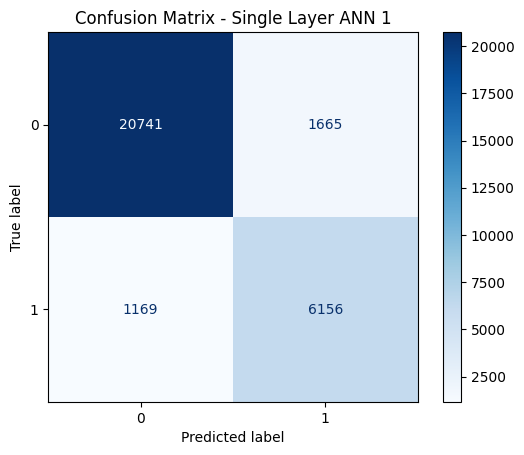

Single Layer ANN 1 Metrics:
Accuracy: 0.9047
Precision: 0.7871
Recall: 0.8404
F1 Score: 0.8129
ROC-AUC Score: 0.9689


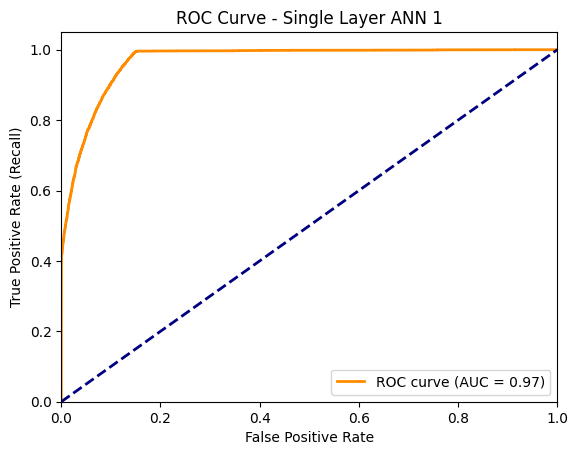

Single Layer ANN 1 ROC-AUC Score: 0.97


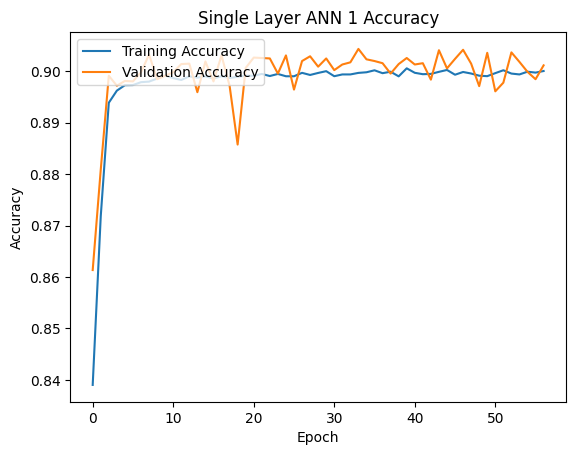

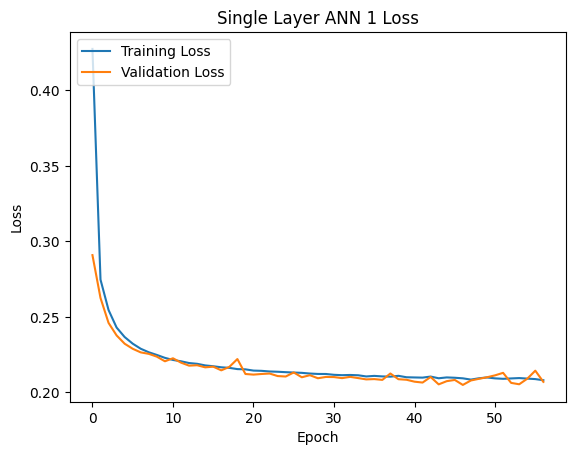

Epoch 1/100


/Users/bhupindergosal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 295us/step - accuracy: 0.8216 - loss: 0.3867 - val_accuracy: 0.9047 - val_loss: 0.1922
Epoch 2/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 274us/step - accuracy: 0.9057 - loss: 0.1890 - val_accuracy: 0.9117 - val_loss: 0.1790
Epoch 3/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 275us/step - accuracy: 0.9103 - loss: 0.1843 - val_accuracy: 0.9151 - val_loss: 0.1751
Epoch 4/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 279us/step - accuracy: 0.9117 - loss: 0.1783 - val_accuracy: 0.9157 - val_loss: 0.1734
Epoch 5/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 331us/step - accuracy: 0.9126 - loss: 0.1743 - val_accuracy: 0.9147 - val_loss: 0.1725
Epoch 6/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 278us/step - accuracy: 0.9129 - loss: 0.1704 - val_accuracy: 0.9143 - val_loss: 0.1707
Epoch 7/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 270us/step - accuracy: 0.9133 - loss: 0.1718 - val_accuracy: 0.9152 - val_loss: 0.1696
Epoch 8/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 274us/step - accuracy: 0.9126 - los

Epoch 50/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 276us/step - accuracy: 0.9161 - loss: 0.1609 - val_accuracy: 0.9179 - val_loss: 0.1615
Epoch 51/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 273us/step - accuracy: 0.9174 - loss: 0.1579 - val_accuracy: 0.9188 - val_loss: 0.1608
Epoch 52/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 272us/step - accuracy: 0.9172 - loss: 0.1580 - val_accuracy: 0.9155 - val_loss: 0.1619
Epoch 53/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 276us/step - accuracy: 0.9164 - loss: 0.1589 - val_accuracy: 0.9174 - val_loss: 0.1604
Epoch 54/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 277us/step - accuracy: 0.9168 - loss: 0.1570 - val_accuracy: 0.9179 - val_loss: 0.1598
Epoch 55/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 274us/step - accuracy: 0.9165 - loss: 0.1584 - val_accuracy: 0.9160 - val_loss: 0.1614
Epoch 56/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 274us/step - accuracy: 0.9171 - loss: 0.1557 - val_accuracy: 0.9201 - val_loss: 0.1599
Epoch 57/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 272us/step - ac

<Figure size 640x480 with 0 Axes>

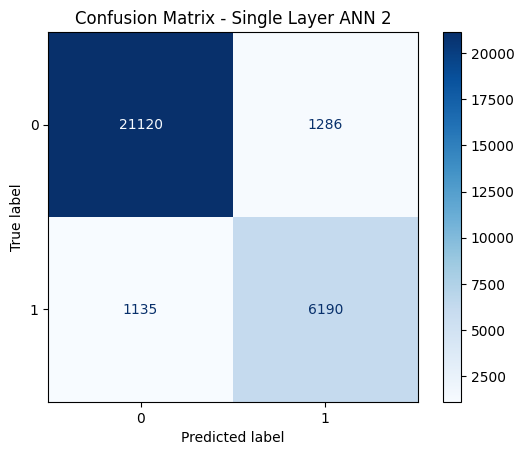

Single Layer ANN 2 Metrics:
Accuracy: 0.9186
Precision: 0.8280
Recall: 0.8451
F1 Score: 0.8364
ROC-AUC Score: 0.9777


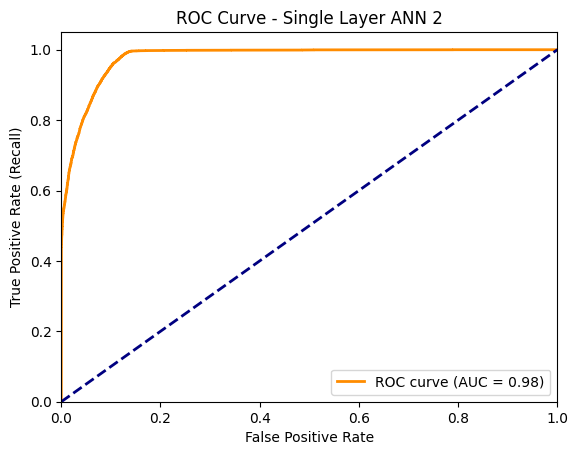

Single Layer ANN 2 ROC-AUC Score: 0.98


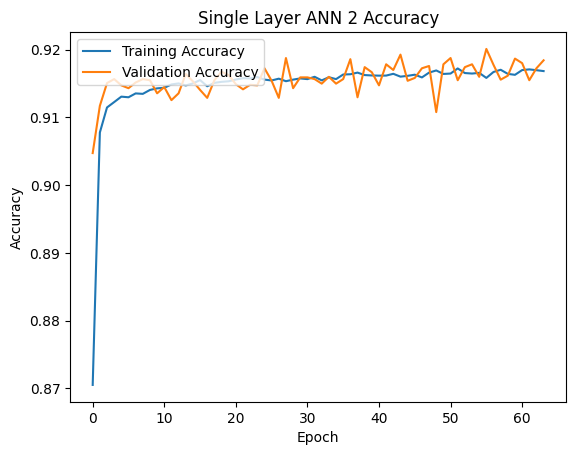

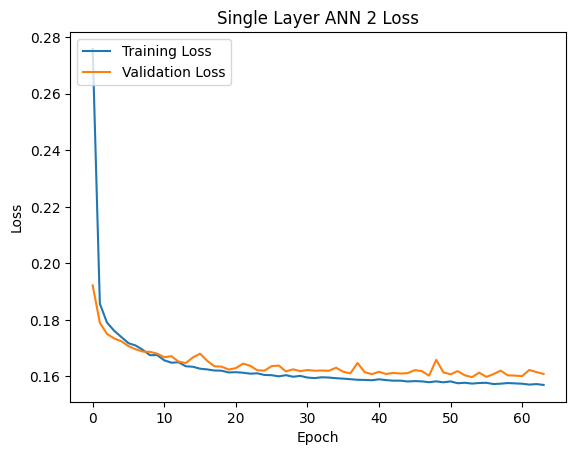

Epoch 1/100


/Users/bhupindergosal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 326us/step - accuracy: 0.8547 - loss: 0.3231 - val_accuracy: 0.9106 - val_loss: 0.1852
Epoch 2/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 290us/step - accuracy: 0.9090 - loss: 0.1850 - val_accuracy: 0.9106 - val_loss: 0.1787
Epoch 3/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 297us/step - accuracy: 0.9097 - loss: 0.1792 - val_accuracy: 0.9138 - val_loss: 0.1754
Epoch 4/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 312us/step - accuracy: 0.9116 - loss: 0.1729 - val_accuracy: 0.9150 - val_loss: 0.1730
Epoch 5/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 286us/step - accuracy: 0.9127 - loss: 0.1746 - val_accuracy: 0.9152 - val_loss: 0.1716
Epoch 6/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 282us/step - accuracy: 0.9113 - loss: 0.1726 - val_accuracy: 0.9152 - val_loss: 0.1681
Epoch 7/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 288us/step - accuracy: 0.9144 - loss: 0.1667 - val_accuracy: 0.9144 - val_loss: 0.1664
Epoch 8/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 278us/step - accuracy: 0.9149 - los

<Figure size 640x480 with 0 Axes>

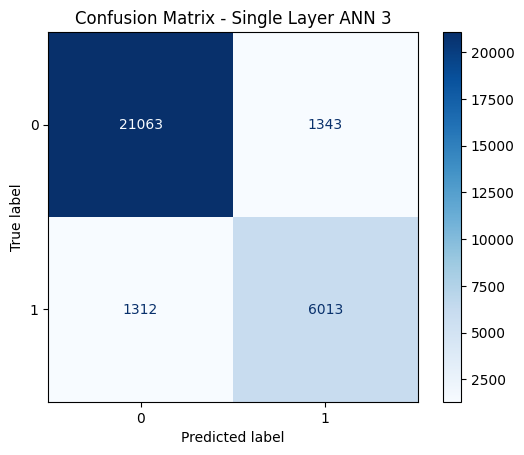

Single Layer ANN 3 Metrics:
Accuracy: 0.9107
Precision: 0.8174
Recall: 0.8209
F1 Score: 0.8192
ROC-AUC Score: 0.9716


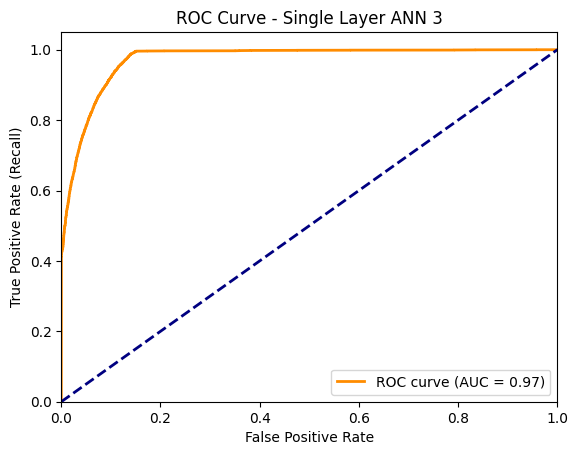

Single Layer ANN 3 ROC-AUC Score: 0.97


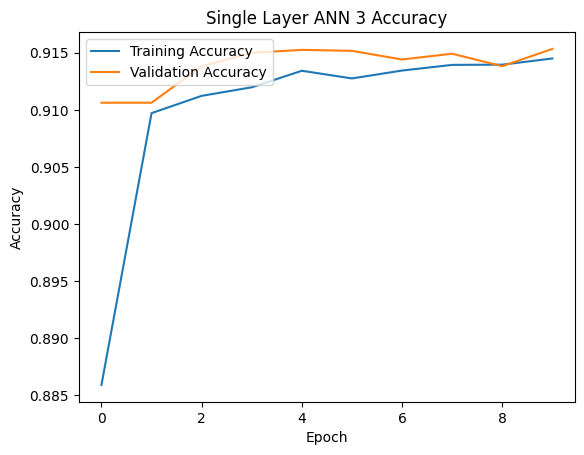

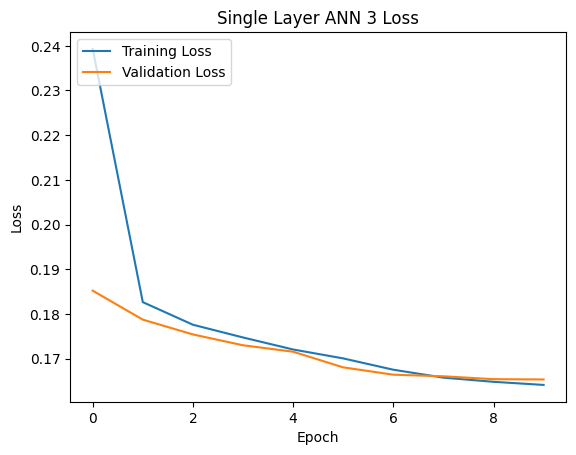

Epoch 1/100


/Users/bhupindergosal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 336us/step - accuracy: 0.8624 - loss: 0.2984 - val_accuracy: 0.9066 - val_loss: 0.1799
Epoch 2/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 316us/step - accuracy: 0.9085 - loss: 0.1774 - val_accuracy: 0.9095 - val_loss: 0.1716
Epoch 3/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 323us/step - accuracy: 0.9116 - loss: 0.1688 - val_accuracy: 0.9109 - val_loss: 0.1676
Epoch 4/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 323us/step - accuracy: 0.9133 - loss: 0.1630 - val_accuracy: 0.9143 - val_loss: 0.1649
Epoch 5/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 321us/step - accuracy: 0.9136 - loss: 0.1624 - val_accuracy: 0.9145 - val_loss: 0.1648
Epoch 6/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 320us/step - accuracy: 0.9141 - loss: 0.1629 - val_accuracy: 0.9167 - val_loss: 0.1598
Epoch 7/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 310us/step - accuracy: 0.9148 - loss: 0.1589 - val_accuracy: 0.9148 - val_loss: 0.1626
Epoch 8/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 319us/step - accuracy: 0.9138 - los

Epoch 50/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 316us/step - accuracy: 0.9193 - loss: 0.1452 - val_accuracy: 0.9187 - val_loss: 0.1487
Epoch 51/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 319us/step - accuracy: 0.9186 - loss: 0.1462 - val_accuracy: 0.9184 - val_loss: 0.1493
Epoch 52/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 309us/step - accuracy: 0.9199 - loss: 0.1442 - val_accuracy: 0.9172 - val_loss: 0.1489
Epoch 53/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 321us/step - accuracy: 0.9202 - loss: 0.1452 - val_accuracy: 0.9177 - val_loss: 0.1521
930/930 ━━━━━━━━━━━━━━━━━━━━ 0s 203us/step
Multi Layer ANN 1 Performance
              precision    recall  f1-score   support

           0       0.95      0.94      0.95     22406
           1       0.83      0.85      0.84      7325

    accuracy                           0.92     29731
   macro avg       0.89      0.89      0.89     29731
weighted avg       0.92      0.92      0.92     29731

930/930 ━━━━━━━━━━━━━━━━━━━━ 0s 192us/step


<Figure size 640x480 with 0 Axes>

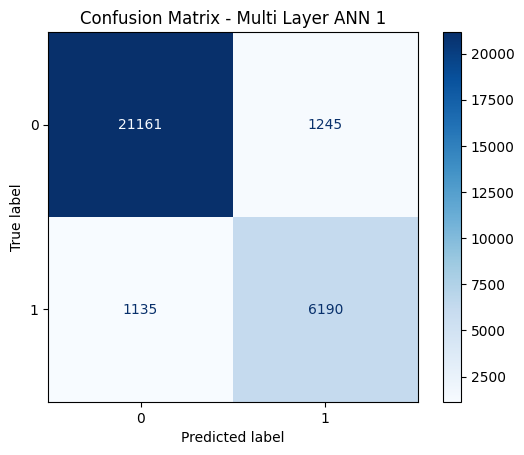

Multi Layer ANN 1 Metrics:
Accuracy: 0.9199
Precision: 0.8325
Recall: 0.8451
F1 Score: 0.8388
ROC-AUC Score: 0.9793


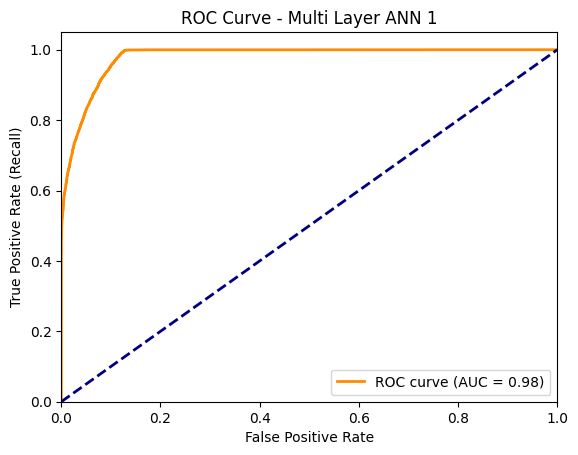

Multi Layer ANN 1 ROC-AUC Score: 0.98


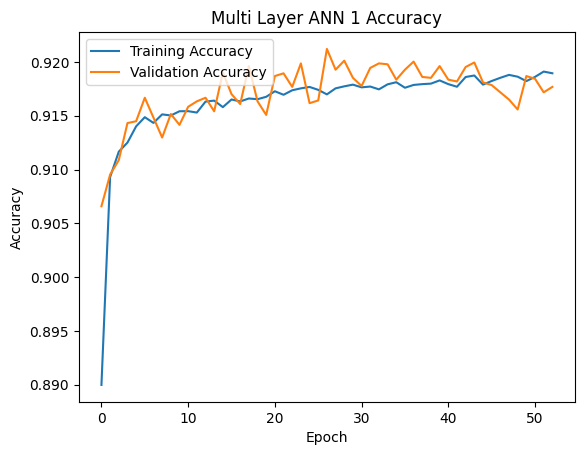

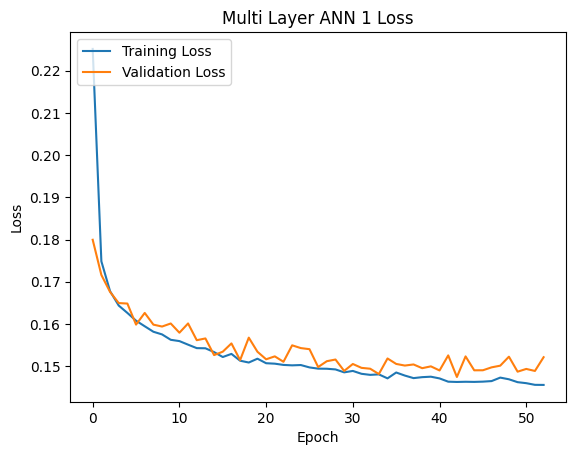

Epoch 1/100


/Users/bhupindergosal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3345/3345 ━━━━━━━━━━━━━━━━━━━━ 2s 372us/step - accuracy: 0.8797 - loss: 0.2539 - val_accuracy: 0.9134 - val_loss: 0.1734
Epoch 2/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 354us/step - accuracy: 0.9112 - loss: 0.1694 - val_accuracy: 0.9108 - val_loss: 0.1689
Epoch 3/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 354us/step - accuracy: 0.9127 - loss: 0.1650 - val_accuracy: 0.9130 - val_loss: 0.1630
Epoch 4/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 354us/step - accuracy: 0.9122 - loss: 0.1631 - val_accuracy: 0.9152 - val_loss: 0.1592
Epoch 5/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 352us/step - accuracy: 0.9140 - loss: 0.1588 - val_accuracy: 0.9105 - val_loss: 0.1650
Epoch 6/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 355us/step - accuracy: 0.9150 - loss: 0.1560 - val_accuracy: 0.9126 - val_loss: 0.1624
Epoch 7/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 356us/step - accuracy: 0.9152 - loss: 0.1541 - val_accuracy: 0.9123 - val_loss: 0.1641
Epoch 8/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 368us/step - accuracy: 0.9167 - los

<Figure size 640x480 with 0 Axes>

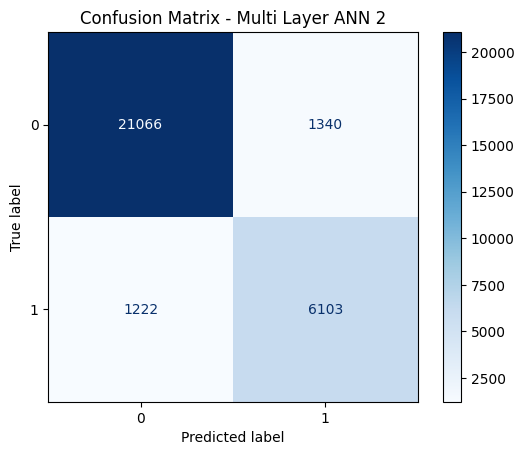

Multi Layer ANN 2 Metrics:
Accuracy: 0.9138
Precision: 0.8200
Recall: 0.8332
F1 Score: 0.8265
ROC-AUC Score: 0.9746


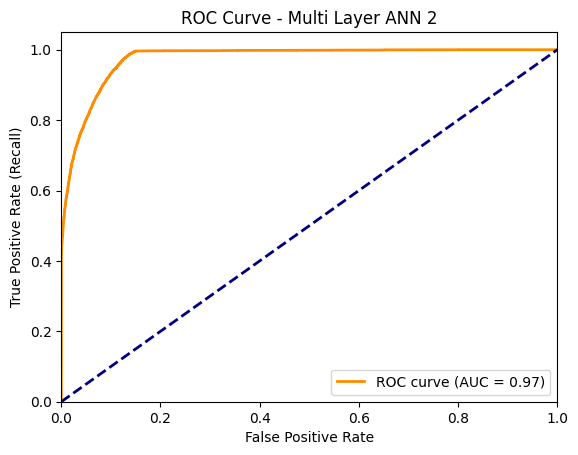

Multi Layer ANN 2 ROC-AUC Score: 0.97


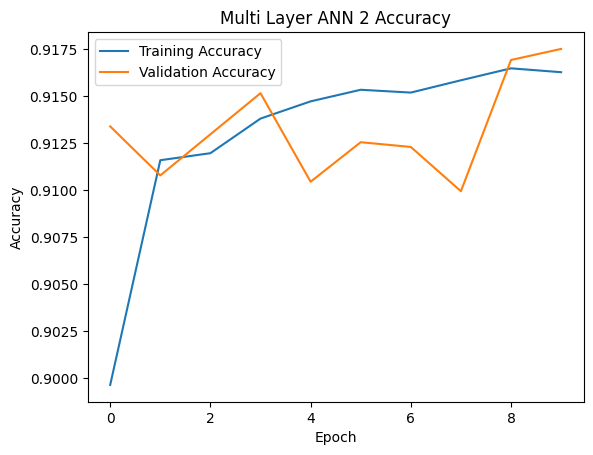

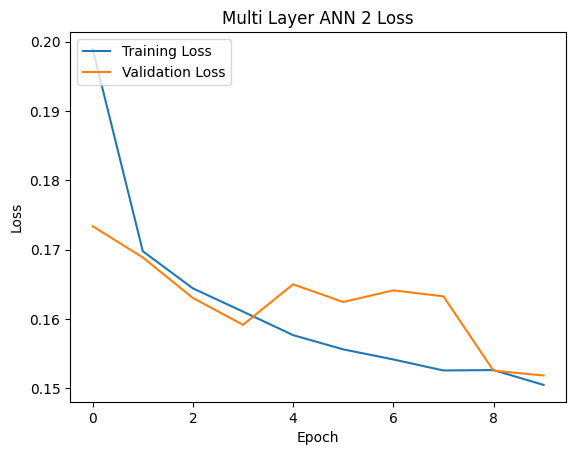

Epoch 1/100


/Users/bhupindergosal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3345/3345 ━━━━━━━━━━━━━━━━━━━━ 2s 448us/step - accuracy: 0.8728 - loss: 0.3043 - val_accuracy: 0.9023 - val_loss: 0.2072
Epoch 2/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 438us/step - accuracy: 0.8922 - loss: 0.2201 - val_accuracy: 0.9059 - val_loss: 0.2023
Epoch 3/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 437us/step - accuracy: 0.8942 - loss: 0.2125 - val_accuracy: 0.9083 - val_loss: 0.1899
Epoch 4/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 437us/step - accuracy: 0.8953 - loss: 0.2113 - val_accuracy: 0.9106 - val_loss: 0.1825
Epoch 5/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 2s 446us/step - accuracy: 0.8965 - loss: 0.2065 - val_accuracy: 0.9078 - val_loss: 0.1877
Epoch 6/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 437us/step - accuracy: 0.8950 - loss: 0.2091 - val_accuracy: 0.9090 - val_loss: 0.1849
Epoch 7/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 436us/step - accuracy: 0.8967 - loss: 0.2072 - val_accuracy: 0.9094 - val_loss: 0.1838
Epoch 8/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 2s 518us/step - accuracy: 0.8970 - los

<Figure size 640x480 with 0 Axes>

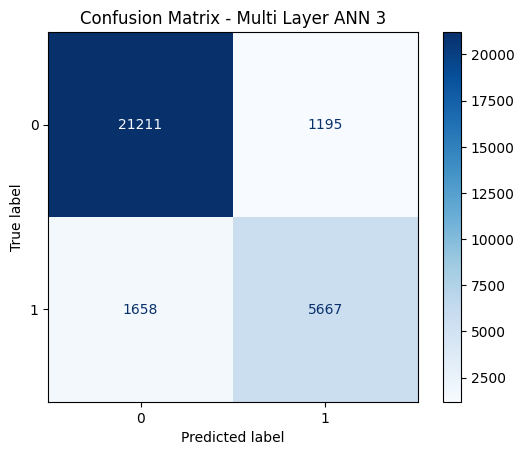

Multi Layer ANN 3 Metrics:
Accuracy: 0.9040
Precision: 0.8259
Recall: 0.7737
F1 Score: 0.7989
ROC-AUC Score: 0.9684


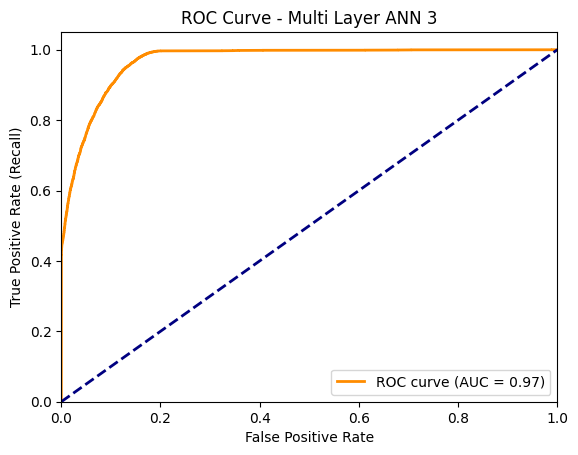

Multi Layer ANN 3 ROC-AUC Score: 0.97


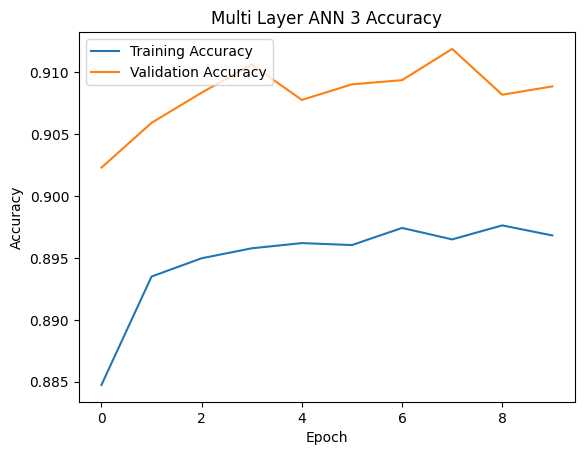

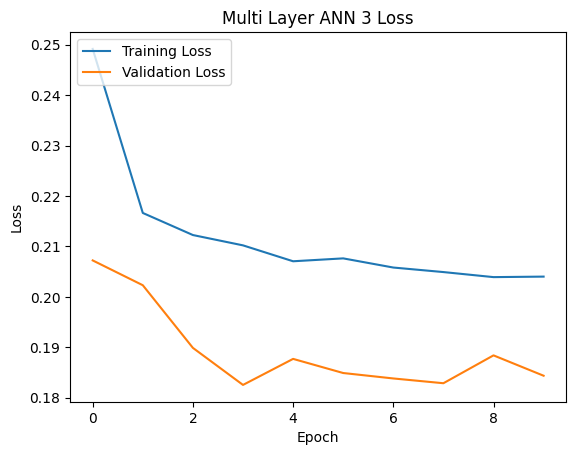

(<Sequential name=sequential_6, built=True>,
 array([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]], dtype=int32),
 array([[3.11423209e-03],
        [3.87417589e-04],
        [2.07090024e-02],
        ...,
        [5.07871334e-07],
        [1.13093556e-04],
        [1.49199669e-03]], dtype=float32))

In [9]:
train_non_weighted_model(build_single_layer_ann_1, 'Single Layer ANN 1', X_train, y_train, X_test, y_test)
train_non_weighted_model(build_single_layer_ann_2, 'Single Layer ANN 2', X_train, y_train, X_test, y_test)
train_non_weighted_model(build_single_layer_ann_3, 'Single Layer ANN 3', X_train, y_train, X_test, y_test)

train_non_weighted_model(build_multi_layer_ann_1, 'Multi Layer ANN 1', X_train, y_train, X_test, y_test)
train_non_weighted_model(build_multi_layer_ann_2, 'Multi Layer ANN 2', X_train, y_train, X_test, y_test)
train_non_weighted_model(build_multi_layer_ann_3, 'Multi Layer ANN 3', X_train, y_train, X_test, y_test)



Weighted Test

In [12]:
def build_multi_layer_ann_custom():
    model = Sequential()
    
    
    # model.add(GaussianNoise(0.1))
    
    
    model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],))) 
    model.add(Dense(8, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [13]:
def train_weighted_model(model_fn, model_name, X_train, y_train, X_test, y_test, epochs=100, batch_size=32, threshold=0.5):
    
    y_train = np.array(y_train, dtype=int)
    class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
    

    model = model_fn()
    
    try:
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, shuffle = True, callbacks = [early_stopping])
    except Exception as e:
        print(f"An error occurred during model training: {e}")
        return None, None, None, None
    
    
    y_pred = evaluate_model_performance(model, X_test, y_test, threshold=threshold, model_name=model_name)
    y_probs = model.predict(X_test)
   
    plot_confusion_matrix(y_test, y_pred, y_probs, model_name=model_name)

    plot_learning_curves(history, model_name=model_name)
    plot_roc_curve(y_test, y_probs, model_name=model_name)
    return model, history, y_pred, y_probs

Epoch 1/100


/Users/bhupindergosal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3345/3345 ━━━━━━━━━━━━━━━━━━━━ 2s 371us/step - accuracy: 0.8430 - loss: 0.3338 - val_accuracy: 0.9036 - val_loss: 0.1855
Epoch 2/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 344us/step - accuracy: 0.9086 - loss: 0.1786 - val_accuracy: 0.9099 - val_loss: 0.1742
Epoch 3/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 425us/step - accuracy: 0.9097 - loss: 0.1740 - val_accuracy: 0.9131 - val_loss: 0.1703
Epoch 4/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 2s 455us/step - accuracy: 0.9093 - loss: 0.1736 - val_accuracy: 0.9121 - val_loss: 0.1695
Epoch 5/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 369us/step - accuracy: 0.9133 - loss: 0.1668 - val_accuracy: 0.9123 - val_loss: 0.1647
Epoch 6/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 395us/step - accuracy: 0.9128 - loss: 0.1649 - val_accuracy: 0.9161 - val_loss: 0.1628
Epoch 7/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 411us/step - accuracy: 0.9137 - loss: 0.1630 - val_accuracy: 0.9151 - val_loss: 0.1601
Epoch 8/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 418us/step - accuracy: 0.9135 - los

<Figure size 640x480 with 0 Axes>

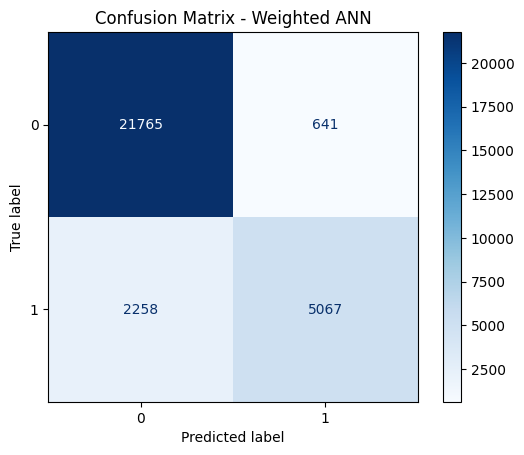

Weighted ANN Metrics:
Accuracy: 0.9025
Precision: 0.8877
Recall: 0.6917
F1 Score: 0.7776
ROC-AUC Score: 0.9722


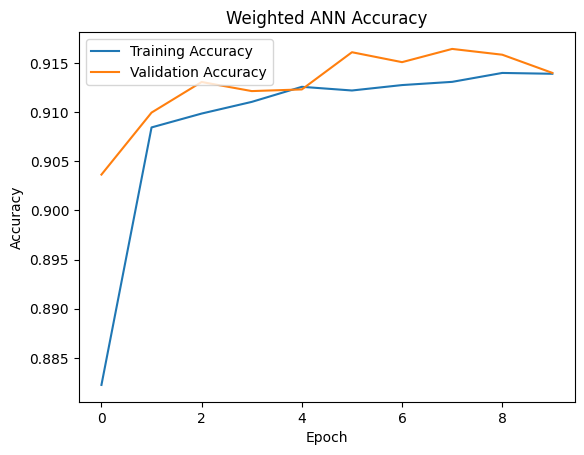

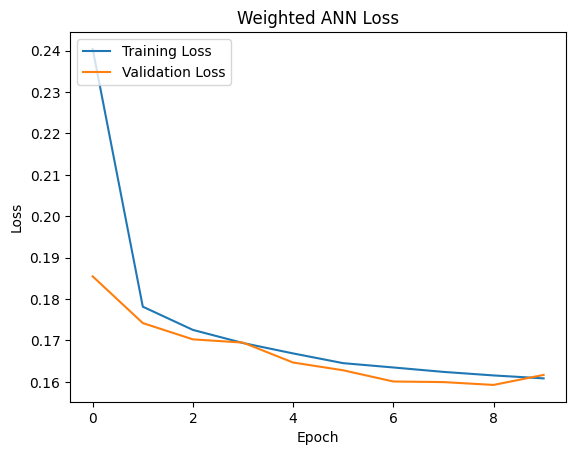

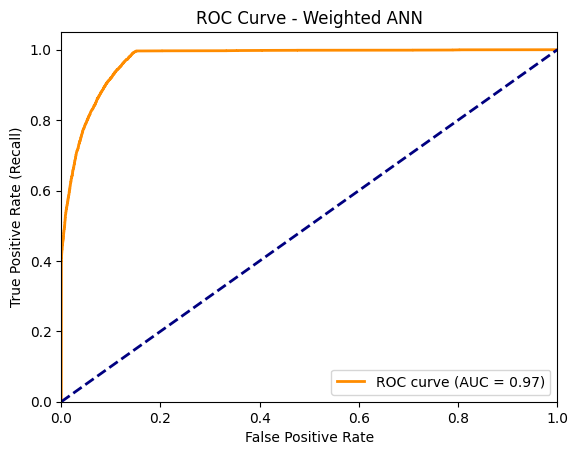

Weighted ANN ROC-AUC Score: 0.97


(<Sequential name=sequential_7, built=True>,
 array([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]], dtype=int32),
 array([[3.8425671e-04],
        [2.1799965e-08],
        [8.9388160e-04],
        ...,
        [6.5623652e-12],
        [2.7231667e-10],
        [2.1092867e-06]], dtype=float32))

In [14]:
train_weighted_model(build_multi_layer_ann_custom, 'Weighted ANN', X_train, y_train, X_test, y_test)

SMOTE Test

In [15]:
def apply_smote_and_train(model_fn, model_name, X_train, y_train, X_test, y_test, epochs=100, batch_size=32, threshold=0.5):
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
    model = model_fn()
    history = model.fit(X_resampled, y_resampled, epochs=epochs, batch_size=batch_size, 
                       validation_split=0.1, shuffle = True, 
                        callbacks=[early_stopping])
    
    y_pred = evaluate_model_performance(model, X_test, y_test, threshold=threshold, model_name=model_name)
    y_probs = model.predict(X_test)
    
    
    plot_confusion_matrix(y_test, y_pred, y_probs, model_name=model_name)
    plot_roc_curve(y_test, y_probs, model_name=model_name)
    plot_learning_curves(history, model_name=model_name)
    #plot_precision_recall_vs_threshold(y_test, y_probs, model_name=model_name)
    
    return model, history, y_pred, y_probs


Epoch 1/100


/Users/bhupindergosal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5042/5042 ━━━━━━━━━━━━━━━━━━━━ 2s 362us/step - accuracy: 0.8210 - loss: 0.3607 - val_accuracy: 0.9812 - val_loss: 0.1815
Epoch 2/100
5042/5042 ━━━━━━━━━━━━━━━━━━━━ 2s 340us/step - accuracy: 0.9145 - loss: 0.1948 - val_accuracy: 0.9906 - val_loss: 0.1551
Epoch 3/100
5042/5042 ━━━━━━━━━━━━━━━━━━━━ 2s 339us/step - accuracy: 0.9162 - loss: 0.1891 - val_accuracy: 0.9871 - val_loss: 0.1417
Epoch 4/100
5042/5042 ━━━━━━━━━━━━━━━━━━━━ 2s 343us/step - accuracy: 0.9172 - loss: 0.1865 - val_accuracy: 0.9860 - val_loss: 0.1602
Epoch 5/100
5042/5042 ━━━━━━━━━━━━━━━━━━━━ 2s 342us/step - accuracy: 0.9179 - loss: 0.1858 - val_accuracy: 0.9689 - val_loss: 0.1699
Epoch 6/100
5042/5042 ━━━━━━━━━━━━━━━━━━━━ 2s 339us/step - accuracy: 0.9203 - loss: 0.1822 - val_accuracy: 0.9430 - val_loss: 0.2166
Epoch 7/100
5042/5042 ━━━━━━━━━━━━━━━━━━━━ 2s 359us/step - accuracy: 0.9210 - loss: 0.1799 - val_accuracy: 0.9880 - val_loss: 0.1721
Epoch 8/100
5042/5042 ━━━━━━━━━━━━━━━━━━━━ 2s 390us/step - accuracy: 0.9215 - los

<Figure size 640x480 with 0 Axes>

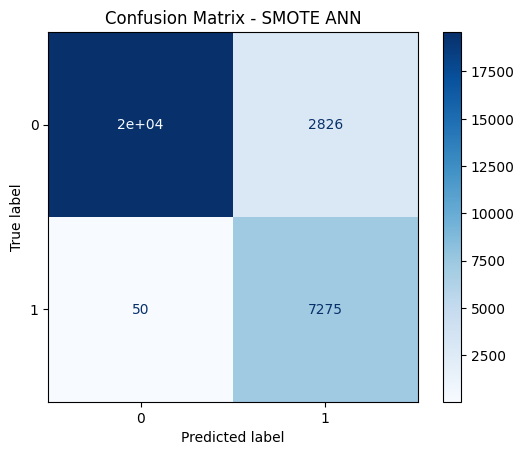

SMOTE ANN Metrics:
Accuracy: 0.9033
Precision: 0.7202
Recall: 0.9932
F1 Score: 0.8350
ROC-AUC Score: 0.9780


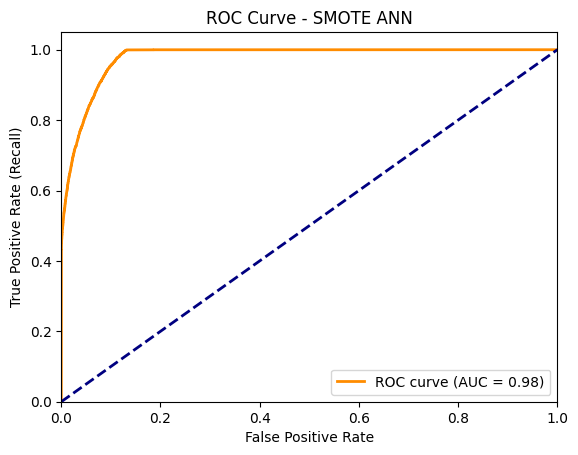

SMOTE ANN ROC-AUC Score: 0.98


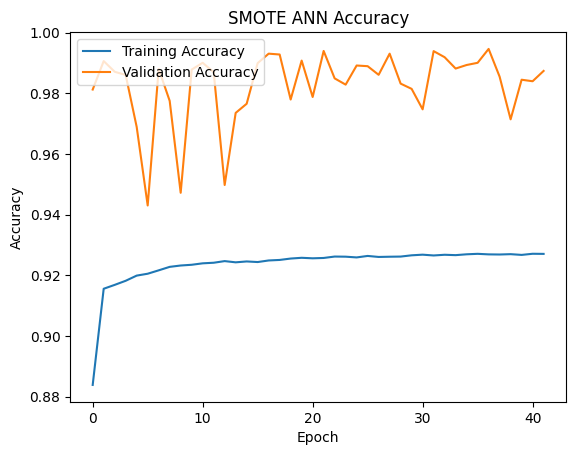

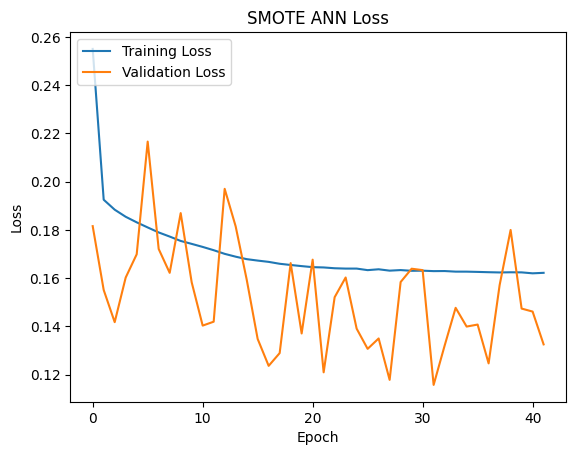

(<Sequential name=sequential_8, built=True>,
 array([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]], dtype=int32),
 array([[5.3535036e-08],
        [1.3282103e-04],
        [4.0815294e-06],
        ...,
        [2.0947304e-09],
        [4.5608977e-05],
        [1.9357959e-02]], dtype=float32))

In [16]:
apply_smote_and_train(build_multi_layer_ann_custom, 'SMOTE ANN', X_train, y_train, X_test, y_test)